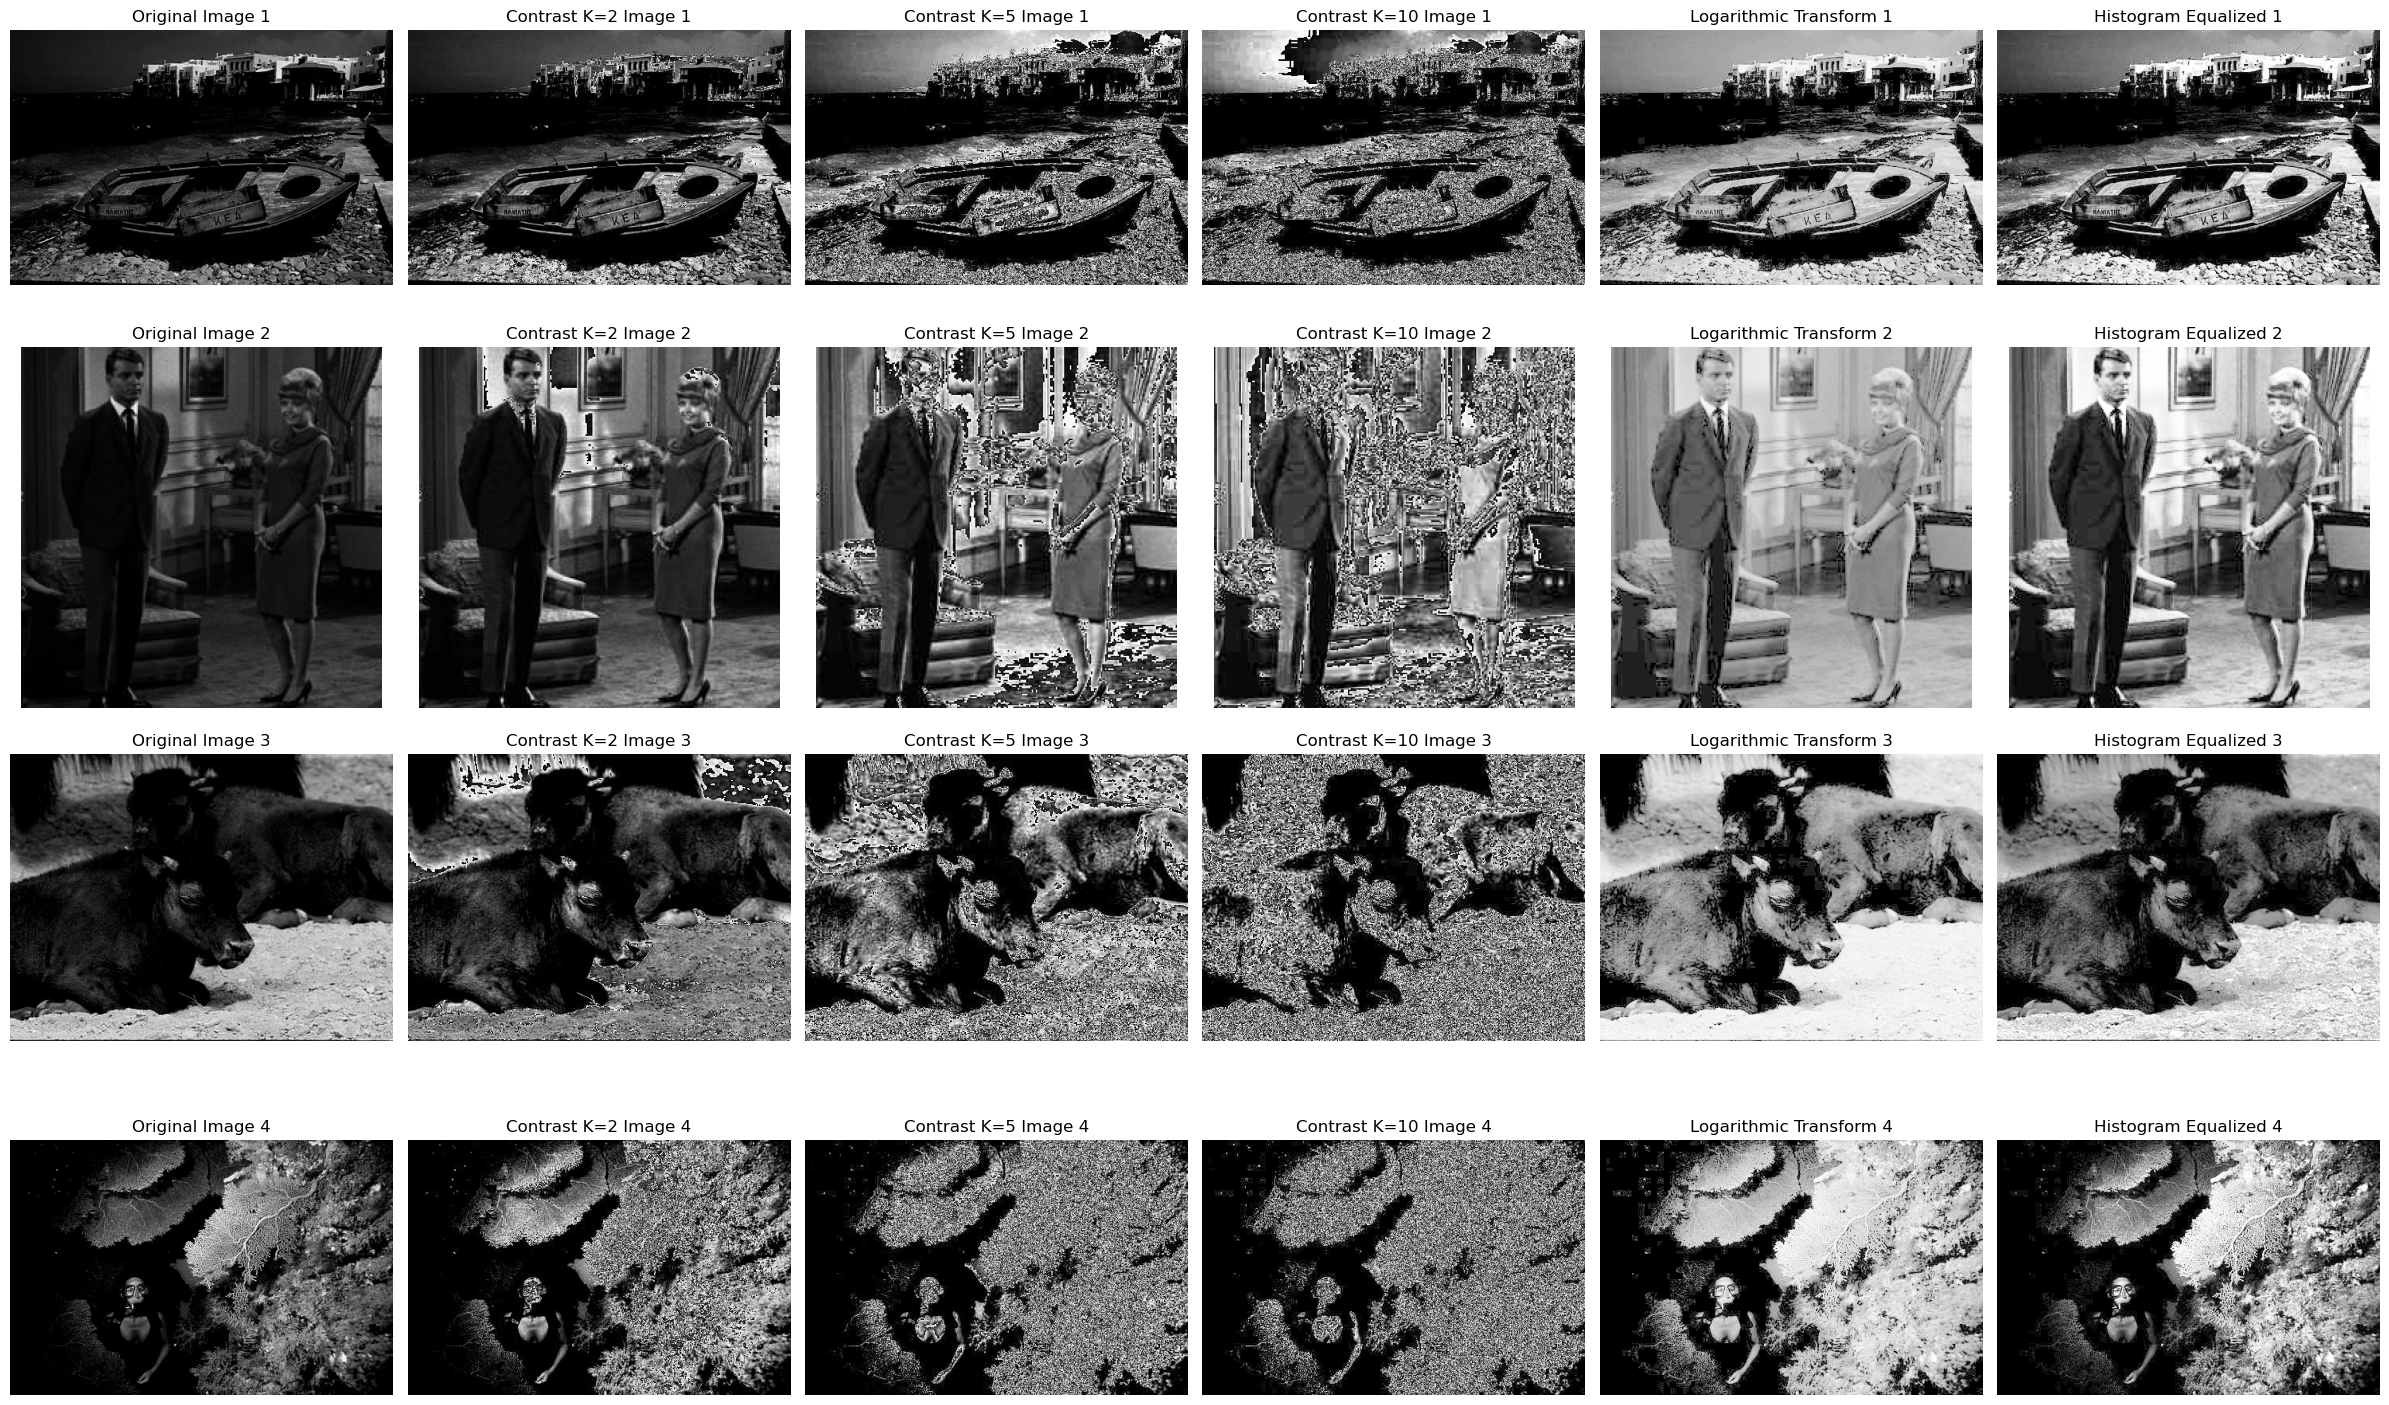

In [5]:
'''

https://sites.google.com/view/badrisubudhi/home


1. Go to the Assignment Image tab 
2. Take 4 images from Assignment - 1 
3. Implement following:

a) K=2, K=5, K=10 go for the image contrast increment

b) Apply logarithmic transform on all 4 images  

c) Apply histogram equalization on 4 images

'''


import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suppressing runtime warnings if any
warnings.filterwarnings("ignore", category=RuntimeWarning)

# load images from files
def load_images(paths):
    images = []
    for path in paths:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        images.append(image)
    return images

# apply contrast increment
def contrast_increase(image, K):
    return np.clip(K * image, 0, 255).astype(np.uint8)

# apply log transform
def logarithmic_transform(image):
    
    image = np.where(image == 0, 1e-5, image)
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image)
    return np.array(log_image, dtype=np.uint8)

# apply histogram equalization
def histogram_equalization(image):
    return cv2.equalizeHist(image)

# Paths of images - file uploaded to jupyternotebook.
image_paths = ['boat.jpg', 'Couple.jpg', 'cow.jpg', 'dive.jpg']
images = load_images(image_paths)

# Contrast with different K values
K_values = [2, 5, 10]
contrast_images = {K: [contrast_increase(img, K) for img in images] for K in K_values}

# Apply log transform
logarithmic_images = [logarithmic_transform(img) for img in images]

# Apply histogram equalization
histogram_equalized_images = [histogram_equalization(img) for img in images]

# Display original,processed images
fig, axes = plt.subplots(len(images), 6, figsize=(24, 15))
for i, image in enumerate(images):
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title(f'Original Image {i+1}')
    
    # Contrast images for K=2, K=5,K=10
    for j, K in enumerate(K_values, start=1):
        axes[i, j].imshow(contrast_images[K][i], cmap='gray')
        axes[i, j].set_title(f'Contrast K={K} Image {i+1}')
    
    # Logtransformation
    axes[i, 4].imshow(logarithmic_images[i], cmap='gray')
    axes[i, 4].set_title(f'Logarithmic Transform {i+1}')
    
    # Histogram equalization
    axes[i, 5].imshow(histogram_equalized_images[i], cmap='gray')
    axes[i, 5].set_title(f'Histogram Equalized {i+1}')

# Hide axes and display
for ax in axes.flatten():
    ax.axis('off')
plt.tight_layout()
plt.show()
